# Dependencies and packages

In [1]:
# Installing libraires if not installed
!pip install numpy pandas seaborn matplotlib scipy

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_86294/3145733545.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Exercise 1

In [2]:
# Headers for the data based on assignment
headers = ["age", "FEV1", "height", "gender", "smoking status", "weight"]

# Reader csv file with specified headers
df = pd.read_csv(filepath_or_buffer="./smoking.csv", sep="\t", names=headers)
df.head()

,age,FEV1,height,gender,smoking status,weight
0,9,1.708,57.0,0,0,9.540109
1,8,1.724,67.5,0,0,11.110110
2,7,1.720,54.5,0,0,9.513850
3,9,1.558,53.0,1,0,11.455923
4,9,1.895,57.0,1,0,10.297130


In [3]:
# Dividing into smokers and non-smokers
smokers = df.loc[df["smoking status"] == 1]
print(f"Smokers:\n{smokers.head()}")
non_smokers = df.loc[df["smoking status"] == 0]
print(f"Non-smokers:\n{non_smokers.head()}")

Smokers:
     age   FEV1  height  gender  smoking status     weight
190    9  1.953    58.0       1               1  10.681227
331   14  2.236    66.0       0               1   9.516722
357   14  3.428    64.0       0               1   9.709458
365   13  3.208    61.0       0               1  10.049842
368   11  1.694    60.0       1               1   9.518883
Non-smokers:
   age   FEV1  height  gender  smoking status     weight
0    9  1.708    57.0       0               0   9.540109
1    8  1.724    67.5       0               0  11.110110
2    7  1.720    54.5       0               0   9.513850
3    9  1.558    53.0       1               0  11.455923
4    9  1.895    57.0       1               0  10.297130


In [4]:
# Function for calculating the average fev1
def average_lung_function_in_fev1(smoking_status):
    average = np.mean(smoking_status["FEV1"])
    return average
avg_smokers_fev1 = average_lung_function_in_fev1(smokers)
avg_non_smokers_fev1 = average_lung_function_in_fev1(non_smokers)
print(f"Smokers avg: {avg_smokers_fev1}\nNon-smokers avg: {avg_non_smokers_fev1}")

Smokers avg: 3.2768615384615383
Non-smokers avg: 2.5661426146010187


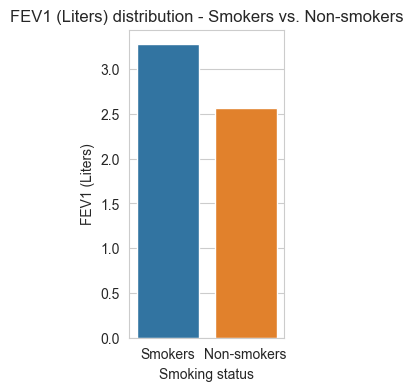

/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_86294/2861023093.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='age', y='FEV1', data=df, palette=sns.color_palette("pastel"))


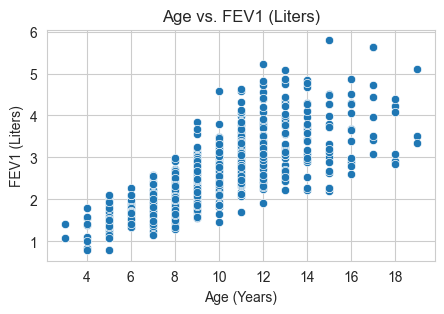

In [5]:
# Investigating plots
# Plotting the averages
plt.figure(figsize=(2,4))
sns.set_style("whitegrid")
sns.barplot(x=["Smokers", "Non-smokers"], y=[avg_smokers_fev1, avg_non_smokers_fev1], hue=["Smokers", "Non-smokers"])
plt.title("FEV1 (Liters) distribution - Smokers vs. Non-smokers")
plt.xlabel("Smoking status")
plt.ylabel("FEV1 (Liters)")
plt.show()

# Scatterplot
plt.figure(figsize=(5, 3))
sns.scatterplot(x='age', y='FEV1', data=df, palette=sns.color_palette("pastel"))
plt.title('Age vs. FEV1 (Liters)')
plt.xlabel('Age (Years)')
plt.ylabel('FEV1 (Liters)')
plt.show()

Am I surprised?<br>
As to my knowledge FEV1 is a measure of the amount of air possible to exhale within the first second after fully filled your lungs.<br>
From the chart we can derive that smokers seem to exhale more than non-smokers.<br>
At first though this surprised me, but after a while it occurred that a lot of the non-smokers might be children, and that their lung-capacity isn't large enough compared to smokers.<br>
Therefore, I makes sense that smokers have a higher FEV1 score due to their higher age and there by larger lung capacity compared to non-smokers. 

# Exercise 2

/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_86294/2142350253.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x="smoking status", y="FEV1", data=df, hue="smoking status", palette=sns.color_palette("muted6"))


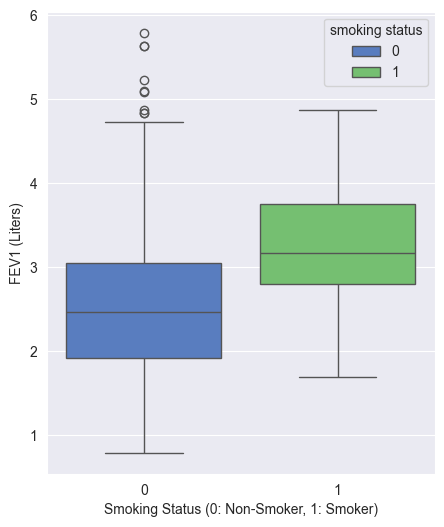

In [6]:
# Smokers and non-smokers boxplots
plt.figure(figsize=(5, 6))
sns.set_style("darkgrid")
sns.boxplot(x="smoking status", y="FEV1", data=df, hue="smoking status", palette=sns.color_palette("muted6"))
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
# plt.xticks(np.arange(len(set(df["smoking status"]))), ["Non-smokers", "Smokers"])
plt.ylabel("FEV1 (Liters)")
plt.show()

# Exercise 3

H0: Smokers and Non-smokers has the same mean<br>
H1: Smokers and Non-smokers do NOT have the same mean

In [7]:
'''
    T statistics
'''
# Smokers variance
smokers_fev1 = smokers["FEV1"]
smokers_fev1_var = np.var(smokers_fev1)
print(smokers_fev1_var)
print(len(smokers))
print(len(non_smokers))

# Non-smokers variance
non_smokers_fev1 = non_smokers["FEV1"]
non_smokers_fev1_var = np.var(non_smokers_fev1)
print(non_smokers_fev1_var)

# T-test denominator
t_denominator = np.sqrt(np.divide((smokers_fev1_var), (len(smokers))) + np.divide((non_smokers_fev1_var), (len(non_smokers))))

# Sample average diff
sample_avg_diff = avg_smokers_fev1 - avg_non_smokers_fev1

# Calculating T
t_val = np.divide(sample_avg_diff, t_denominator)

# printing t-statistic
print(t_val)


0.5538259346745561
65
589
0.7221586893384949
7.1990318609997095


In [8]:
'''
    Degrees of freedom
'''
# Numerator
numerator = np.square(np.divide(smokers_fev1_var, len(smokers)) + np.divide(non_smokers_fev1_var, len(non_smokers)))

# Denominator
denominator = np.divide(np.square(smokers_fev1_var), (np.dot(np.square(len(smokers)), (len(smokers)-1)))) + np.divide(np.square(non_smokers_fev1_var), (np.dot(np.square(len(non_smokers)), (len(non_smokers)-1))))

# Degrees of Freedom
v = np.floor(np.divide(numerator, denominator))
print(f"Degrees of Freedom: {v}")

Degrees of Freedom: 83.0


In [9]:
'''
    T-statistics value
'''
from scipy.stats import t
p = 2 * t.cdf(-t_val, v)
res = 1 if p > .05 else 0 # 1: acceptance, 0: rejection

print(f"Result: {res}")

Result: 0


# Exercise 4

In [13]:
from scipy import stats

# Calculating the pearson correlation
pearson_correlation, pearson_p_value = stats.pearsonr(df["age"], df["FEV1"])
# Calculating the spearman correlation
spearman_correlation, spearman_p_value = stats.spearmanr(df["age"], df["FEV1"])
#print(f"Correlation: {pearson_correlation.correlation}")
print(f"Pearson correlation:\n\tCorrelation: {pearson_correlation}\n\tP-value: {pearson_p_value}")
print(f"Spearman correlation:\n\tCorrelation: {spearman_correlation}\n\tP-value: {spearman_p_value}")


Pearson correlation:
	Correlation: 0.7564589899896005
	P-value: 2.453960190348484e-122
Spearman correlation:
	Correlation: 0.7984229001546537
	P-value: 8.602077211120334e-146


/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_86294/4104012430.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x="age", y="FEV1", hue="smoking status", palette=sns.color_palette("muted6"))


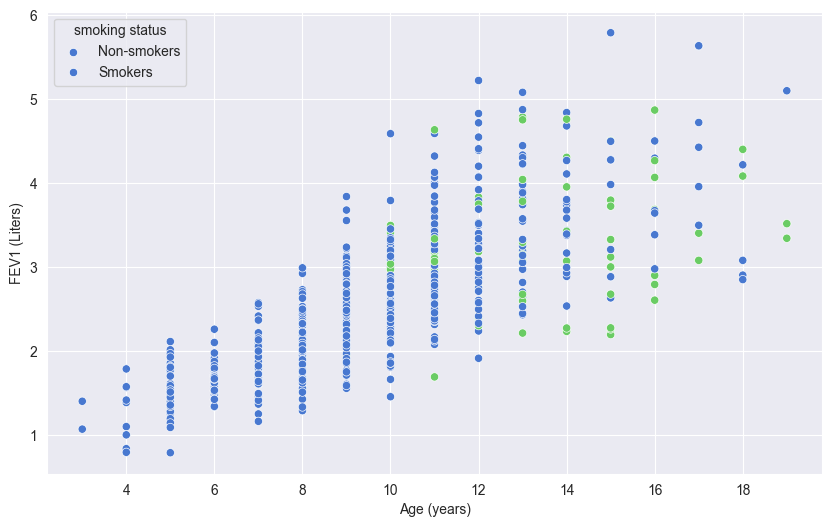

In [17]:
# Plotting age vs. FEV1
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="age", y="FEV1", hue="smoking status", palette=sns.color_palette("muted6"))
plt.legend(loc="upper left", title="smoking status", labels=["Non-smokers", "Smokers"])
plt.xlabel("Age (years)")
plt.ylabel("FEV1 (Liters)")
plt.show()

# Exercise 5

/var/folders/3p/j_x44c2s1g9cmby7tjycr9vh0000gn/T/ipykernel_79953/1604468121.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=df, x="age", hue="smoking status", discrete=True, palette=sns.color_palette("muted6"))


([<matplotlib.axis.XTick at 0x16e8a6140>,
 [Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

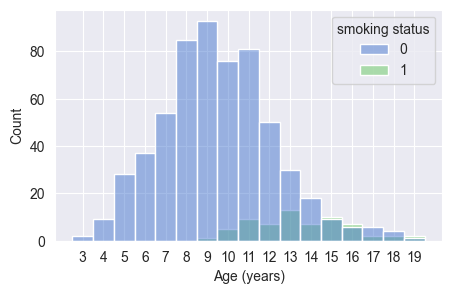

In [87]:
plt.figure(figsize=(5, 3))
sns.set_style("darkgrid")
sns.histplot(data=df, x="age", hue="smoking status", discrete=True, palette=sns.color_palette("muted6"))
plt.xlabel("Age (years)")
plt.xticks(np.arange(3, 20))